In [1]:
# Import libraries:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Practical Exercise 2

This exercise uses an easy to use modification of the original MNIST hand written digits.
In particular, we use MNIST test data that contains 10,000 images in a csv format from [Kaggle](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv/). Each digit (0..9) is contained approximately 1,000 times. The csv file is stored in ```/sources/sheet2```. The file ```mnist_test.csv``` contains 10,000 test examples and labels. Each row consists of 785 values: the first value is the label (a number from 0 to 9) and the remaining 784 values are the pixel values (a number from 0 to 255).

In [2]:
# Read csv containint 10,000 test examples:
mnist_test_pd = pd.read_csv("../../sources/sheet2/mnist_test.csv")

# Convert to numpy array:
mnist_test_np = np.array(mnist_test_pd)

# Extract first column of second dimension, that contains labels:
labels = mnist_test_np[:,0]

# Keep only the pixel values from mnist samples as one long vector per sample:
mnist_test_vec = mnist_test_np[:,1:]

# Reshape samples to have 28 x 28 pixels per sample:
mnist_test_2D = np.reshape(mnist_test_vec, (-1,28,28))

# Check dimensions:
print('Data dimensions (as vector) (#samples, #pixels):',np.shape(mnist_test_vec))
print('Data dimensions (as 2D images) (#samples, #rows, #columns):',np.shape(mnist_test_2D))
print('Label dimensions (#samples):',np.shape(labels))

Data dimensions (as vector) (#samples, #pixels): (10000, 784)
Data dimensions (as 2D images) (#samples, #rows, #columns): (10000, 28, 28)
Label dimensions (#samples): (10000,)


#### Exercise L-2.1 (Analysis of hand written digits)

a. Write a function ```show_data(im_num)```with one input parameter to display ```im_num``` example images for each digit.

b. Write a function ```show_mean_and_variance(digit)``` which plots the mean and variance of all samples for ```digit``` (see lecture, Chapter 1).

c. Plot the gray value distribution of pixel number 297 (using the vector representation of the image for indexing) for all given images of digit 3.

d. Extend the tool from c. to sequentially analyse the images of a given digit at 10 different *interesting* pixel positions. The current pixel must be adequately illustrated.

e. Generate covariance images, showing the correlation between a given base pixel and all other pixels in the image. To this end, write a function ```show_correlation(digit, x, y)``` which receives three parameters:
- ```digit``` to be analyzed
- $x$ coordinate of base pixel
- $y$ coordinate of base pixel

**Note:** The origin is at the top left, $x$ runs from left to right and $y$ from top to bottom

f. Write a function ```show_joint_probs(min, max, digit)```, that considers all images of a specific ```digit``` and computes for each pixel the conditional joint probability:

$P(\text{gray value} \geq \text{min}, \text{gray value} < \text{max}\,\,|\,\,\text{digit, pixel})$.

As with b., the result has to be displayed as a new image in format $28 \times 28$.

**Note:** The interval of the minimal and maximal probability $[\text{min}(P), \text{max}(P)]$ should be linearly mapped to the full gray value range from $0$ to $255$ in order to get an optimal display.

Generate images for the gray value intervals (defined by the parameters ```min```and ```max```):
- $[0, 1[$
- $[1, 50]$
- $[50, 150]$
- $[250, 255]$

#### Part a.

In [37]:
# Define a function show_data(im_num): 
def show_data(im_num):
    """
    Display the first im_num images for each digit.

    Parameters:
    ===========
    im_num: int number to specify number of images to be shown for each digit

    Returns:
    ========
    no return values, just show plots

    """

    # Initialize plot:
    fig = plt.figure()
    
    # Loop over digits 0..9:
    for digit in range(10):
        
        # Loop over first im_num samples for current digit:
        for i in range(im_num):
    
            # Show current image in subplot with in total 10 (= columns) x im_num (= rows) samples.
            # Hence, want to have im_num rows and 10 columns (one for each digit).
            # Note: Filling in the subplots is done rowwise.
            ax = fig.add_subplot(im_num, 10, i * 10 + digit + 1)
            ax.imshow(mnist_test_2D[labels==digit][i], cmap='gray_r')
            
            # Omit axes labels:
            ax.set_axis_off()

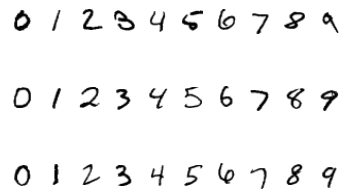

In [38]:
# Test function: Show first 3 samples for each digit:
show_data(3)

#### Part b.

In [56]:
# Define a function show_data(im_num): 
def show_mean_and_variance(digit):
    """
    Plot the mean and variance over all samples for a given digit.

    Parameters:
    ===========
    digit: int number to specify digit

    Returns:
    ========
    no return values, just show plots of mean and variance

    """

    # Get mean and variance over all samples for specified digit:
    mean_2D = np.mean(mnist_test_2D[labels==digit],axis=0)
    var_2D = np.var(mnist_test_2D[labels==digit],axis=0)
    
    # Initialize plot:
    fig = plt.figure()

    # Plot mean:
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(mean_2D, cmap='gray_r')
    ax.set_title('mean')

    # Plot variance:
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(var_2D, cmap='gray_r')
    ax.set_title('variance') 

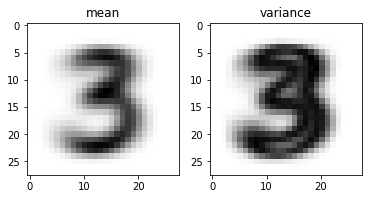

In [60]:
# Test function: Show mean and variance over all samples for digit 3:
show_mean_and_variance(3)